In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
df=pd.read_csv(r"C:\Users\Tanesh Patel\OneDrive\Desktop\MySQL\Python\loan_classification.ipynb\loan_data.csv")

In [69]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [71]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [72]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [73]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [74]:
df.duplicated().sum()

0

In [111]:
X=df.drop(['loan_status'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [112]:
y=df['loan_status']
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [113]:
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No


In [114]:
X['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [115]:
numerical=X.select_dtypes(include=[np.number])
correlation_before=numerical.corr()
correlation_before

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000


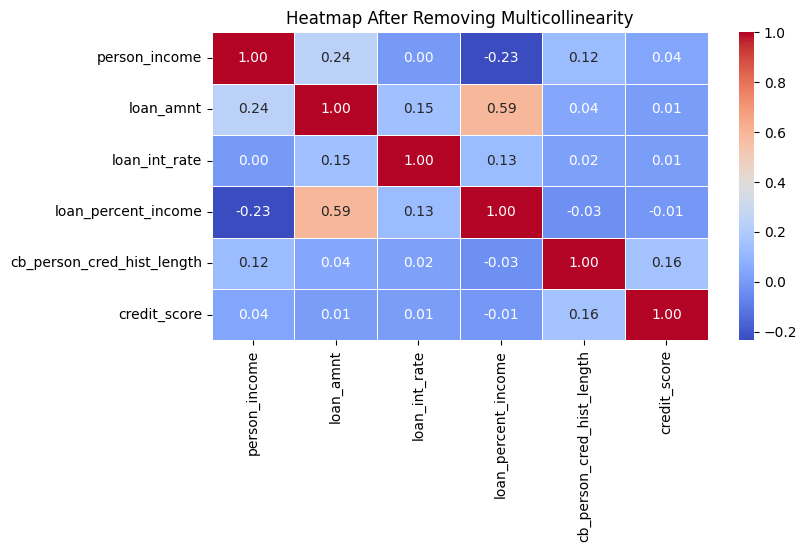

Dropped features to reduce multicollinearity: ['person_emp_exp' 'person_age']


In [116]:
##Set a threshold for high correlation
threshold = 0.8

# Identify highly correlated feature pairs
high_corr_pairs = correlation_before.abs().unstack().reset_index()
high_corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]
high_corr_pairs = high_corr_pairs[(high_corr_pairs["Feature 1"] != high_corr_pairs["Feature 2"]) & 
                                  (high_corr_pairs["Correlation"] > threshold)]

# Keep only unique pairs (avoid duplicate pairs)
high_corr_pairs = high_corr_pairs[high_corr_pairs["Feature 1"] < high_corr_pairs["Feature 2"]]

# Drop one feature from each highly correlated pair
drop_features = high_corr_pairs["Feature 2"].unique()
data_cleaned = numerical.drop(columns=drop_features)

# Compute the correlation matrix after dropping features
correlation_after = data_cleaned.corr()

# Plot heatmap AFTER removing multicollinearity (with values)
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix_after, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap After Removing Multicollinearity")
plt.show()

# Print dropped features
print(f"Dropped features to reduce multicollinearity: {drop_features}")

In [117]:
correlation_after

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
person_income,1.000000,0.242290,0.001510,-0.234177,0.124316,0.035919
loan_amnt,0.242290,1.000000,0.146093,0.593011,0.042969,0.009074
loan_int_rate,0.001510,0.146093,1.000000,0.125209,0.018008,0.011498
loan_percent_income,-0.234177,0.593011,0.125209,1.000000,-0.031868,-0.011483
cb_person_cred_hist_length,0.124316,0.042969,0.018008,-0.031868,1.000000,0.155204
credit_score,0.035919,0.009074,0.011498,-0.011483,0.155204,1.000000


In [118]:
X=X.drop(columns=['person_emp_exp','person_age'])
X


,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,female,Master,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,female,High School,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,female,High School,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,female,Bachelor,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,male,Master,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...
44995,male,Associate,47971.0,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,female,Associate,65800.0,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,male,Associate,56942.0,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,male,Bachelor,33164.0,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No


In [119]:
numerical_features=X.select_dtypes(exclude='object').columns
categorical_fetaures=('person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file')

In [59]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Using cached scipy-1.15.1-cp311-cp311-win_amd64.whl (43.9 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [120]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
numerical_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessing=ColumnTransformer([
    ('OneHotEncoder',oh_transformer,categorical_fetaures),
    ('StandardScaler',numerical_transformer,numerical_features)
],remainder='passthrough') 


In [121]:
X=preprocessing.fit_transform(X)


In [123]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.104090,4.024953,1.683039,4.016394,-0.739109,-1.419814
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-0.846005,-1.359209,0.044782,-0.684829,-0.996863,-2.549975
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.844065,-0.646600,0.625557,3.443074,-0.739109,0.047412
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.007039,4.024953,1.417829,3.443074,-0.996863,0.840507
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.176371,4.024953,1.095549,4.475050,-0.481354,-0.924130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.402231,0.857799,1.562184,1.952442,-0.739109,0.245686
44996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.180537,-0.092348,1.028407,0.003155,1.322928,-0.230171
44997,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.290681,-1.078758,-0.331212,-1.028821,1.065174,0.701716
44998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.586348,0.382726,0.746412,2.525762,0.034155,-0.567237


In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [125]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)


In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


In [133]:
models = {
    "KNeighborsClassifier":KNeighborsClassifier(),
    "SVC":SVC(),
    "DecisionTreeClassifier0":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "XGBClassifier":XGBClassifier()

}

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

    # Store results
model_results = {}

for name, model in models.items():
    try:
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on training data
        y_pred_train = model.predict(X_train)
        
        # Predict on test data
        y_pred_test = model.predict(X_test)
        
        # Calculate metrics for training data
        accuracy_score_train=accuracy_score(y_train,y_pred_train)
        confusion_matrix_train=confusion_matrix(y_train,y_pred_train)
        classification_report_train=classification_report(y_train,y_pred_train)
        
        # Calculate metrics for test data
        accuracy_score_test=accuracy_score(y_test,y_pred_test)
        confusion_matrix_test=confusion_matrix(y_test,y_pred_test)
        classification_report_test=classification_report(y_test,y_pred_test)
    
        # Store the results for each model
        model_results[name] = {
            "Training accuracy score": accuracy_score_train,
            "Training confusion_matrix":confusion_matrix_train ,
            "Training classification": classification_report_train,
            "Testing accuracy score": accuracy_score_test,
            "Testing confusion_matrix": confusion_matrix_test,
            "Testing Classiifcation ": classification_report_test
        }
        
        # Print the results for each model
        print(f"Model: {name}")
        print(f"Training accuracy score: {accuracy_score_train}")
        print(f"Training confusion_matrix: {confusion_matrix_train}")
        print(f"Training classification: {classification_report_train}")
        print(f"Testing accuracy score: {accuracy_score_test}")
        print(f"Testing confusion_matrix: {confusion_matrix_test}")
        print(f"Testing Classification: {classification_report_test}")
        print("="*35)
    
    except Exception as e:
        # If there's an error, print the model name and the error message
        model_results[name] = {"Error": str(e)}
        print(f"Error in {name}: {e}")
        print("="*35)

# If you want to inspect the stored results
print(model_results)

Model: KNeighborsClassifier
Training accuracy score: 0.9290074074074074
Training confusion_matrix: [[25422   848]
 [ 1548  5932]]
Training classification:               precision    recall  f1-score   support

           0       0.94      0.97      0.95     26270
           1       0.87      0.79      0.83      7480

    accuracy                           0.93     33750
   macro avg       0.91      0.88      0.89     33750
weighted avg       0.93      0.93      0.93     33750

Testing accuracy score: 0.8928888888888888
Testing confusion_matrix: [[8243  487]
 [ 718 1802]]
Testing Classification:               precision    recall  f1-score   support

           0       0.92      0.94      0.93      8730
           1       0.79      0.72      0.75      2520

    accuracy                           0.89     11250
   macro avg       0.85      0.83      0.84     11250
weighted avg       0.89      0.89      0.89     11250

Model: SVC
Training accuracy score: 0.923762962962963
Training confusio